# Analysis Notebook

- This notebook provides a demo for the functions of `Analysis` class.
- We show the various features such as:
    - Descriptive stats about _Web Browsing_ and _Meta_ data,
    - Descriptive stats per demographic attribute,
    - Easy Entropy & Predictability calculations
    - Entropy & Predictability Plots
    - Entropy & Predictability Plots by demographic attribute

In [3]:
import pandas as pd
import sys
sys.path.append('../')

In [4]:
from web_tracking.facades.analysis import Analysis

In [5]:
analysis = Analysis()

# Import Raw Data

- We import the users and pre-processed urls data for showing the descriptive stats.

In [6]:
users = pd.read_csv('./data/[0]users_raw.csv').rename(columns={'panelist_id': 'user'})
urls  = pd.read_csv('./data/[2]urls_pre_processed.csv')

# Display User Data Stats

- `display_descriptive_stats` method simply shows a basic statistical results over categorical and numerical data.
- The method shows the stats based on the data type.
- Stats over categorical data gives a distribution, and numerical data gives metrics such as mean, median, etc.
- Method requires a data frame and columns which it makes the calculations.
- The following shows the stats on users data.

In [7]:
temp = analysis.display_descriptive_stats(df=users, columns=['gender', 'age', 'age_recode',
                                                             'children', 'hh_income',  
                                                             'place_of_residence', 'education', 'family'])

,data_type,count,missing,unique
gender,categorical,10,0,2
age,categorical,10,0,8
age_recode,categorical,10,0,4
children,categorical,10,0,2
hh_income,categorical,10,0,5
place_of_residence,categorical,10,0,4
education,categorical,10,0,3
family,categorical,10,0,5


,Gender,Count,Share
0,6fa99b,5,50.0000%
1,8da82a,5,50.0000%


,Age,Count,Share
1,3980,2,20.0000%
0,cf87,2,20.0000%
7,07e0,1,10.0000%
3,3c9f,1,10.0000%
2,7807,1,10.0000%
6,82c5,1,10.0000%
5,a057,1,10.0000%
4,fae9,1,10.0000%


,Age_Recode,Count,Share
0,a714,5,50.0000%
1,2154,2,20.0000%
2,cb21,2,20.0000%
3,bc45,1,10.0000%


,Children,Count,Share
0,ae24,7,70.0000%
1,f70d,3,30.0000%


,Hh_Income,Count,Share
0,a37d,3,30.0000%
3,02c4,2,20.0000%
2,d177,2,20.0000%
1,f8a7,2,20.0000%
4,7770,1,10.0000%


,Place_Of_Residence,Count,Share
0,32b0,4,40.0000%
1,6730,3,30.0000%
2,fee5,2,20.0000%
3,4bdb,1,10.0000%


,Education,Count,Share
0,15a0,4,40.0000%
2,4c63,3,30.0000%
1,b8b1,3,30.0000%


,Family,Count,Share
0,d702,5,50.0000%
1,74d3,2,20.0000%
4,4ee3,1,10.0000%
2,7e9b,1,10.0000%
3,a18e,1,10.0000%


# Display Web Navigation Data Stats

- It is a descriptive stats on urls data.
- `display_descriptive_stats` has been used here as well.

In [8]:
temp = analysis.display_descriptive_stats(df=urls, columns=['domain', 'active_seconds', 'gap_seconds'])

,data_type,count,missing,unique
domain,categorical,18878,0,579


,Domain,Count,Share
0,464c72cc0bd35284,1669,8.8410%
1,4d9945d52d1093fd,1505,7.9722%
2,8f155e77c8af923f,1147,6.0759%
3,5ff45759b5f7a4ec,1064,5.6362%
4,ec0763e5908629a0,1000,5.2972%
5,d544e57fff1938ca,869,4.6032%
6,306bf00500f76b05,695,3.6815%
7,975af2aeb582ca21,680,3.6021%
8,770efda2e6305759,620,3.2842%
10,29326257d3ff35ea,523,2.7704%


,data_type,count,missing,unique,mean,std,min,25%,50%,75%,max
active_seconds,numeric,18878.000000,0,576,41.319843,105.342986,1.000000,4.000000,10.000000,27.000000,2243.000000
gap_seconds,numeric,18878.000000,0,1024,1271.663471,15424.583718,-559.000000,0.000000,0.000000,0.000000,937442.000000


# Descriptive Visit stats per Socio-demographic Group with URLs, Users

- The `display_descriptive_stats_per_attribute` calculates a descriptive stats per demographic attribute, and it uses domain, active_seconds, gap_seconds features for it.
- The method requires urls, users, merging column and a demographic attribute.
- Then it will show the various stats for given parameters.

In [9]:
temp = analysis.display_descriptive_stats_per_attribute(urls, users, 'user', 'gender')

,domain_count,domain_count_coverage,domain_nunique,domain_unique_coverage,active_seconds_sum,active_seconds_coverage,active_seconds_mean,active_seconds_median,gap_seconds_mean
gender,,,,,,,,,
6fa99b,"9,434",49.97%,361,62.35%,"410,421",52.62%,44,10,"1,225"
8da82a,"9,444",50.03%,279,48.19%,"369,615",47.38%,39,10,"1,319"


In [10]:
temp = analysis.display_descriptive_stats_per_attribute(urls, users, 'user', 'education')

,domain_count,domain_count_coverage,domain_nunique,domain_unique_coverage,active_seconds_sum,active_seconds_coverage,active_seconds_mean,active_seconds_median,gap_seconds_mean
education,,,,,,,,,
15a0,"7,550",39.99%,299,51.64%,"282,028",36.16%,37,10,"1,323"
4c63,"5,680",30.09%,159,27.46%,"316,414",40.56%,56,12,"1,211"
b8b1,"5,648",29.92%,210,36.27%,"181,594",23.28%,32,8,"1,264"


In [11]:
temp = analysis.display_descriptive_stats_per_attribute(urls, users, 'user', 'age_recode')

,domain_count,domain_count_coverage,domain_nunique,domain_unique_coverage,active_seconds_sum,active_seconds_coverage,active_seconds_mean,active_seconds_median,gap_seconds_mean
age_recode,,,,,,,,,
2154,"3,821",20.24%,86,14.85%,"129,824",16.64%,34,8,"1,328"
a714,"9,393",49.76%,352,60.79%,"411,498",52.75%,44,10,"1,287"
bc45,"1,864",9.87%,68,11.74%,"62,247",7.98%,33,10,"1,299"
cb21,"3,800",20.13%,153,26.42%,"176,467",22.62%,46,10,"1,163"


# Import Trajectory

In [12]:
binned_non_stationary_domain = pd.read_csv('./data/[3]trajectory_binned_non_stationary_domain.csv')
sequential_non_stationary = pd.read_csv('./data/[4]trajectory_sequential_non_stationary_domain.csv', parse_dates=['starts', 'ends'])
binned_stationary = pd.read_csv('./data/[5]trajectory_binned_stationary.csv')

In [13]:
features=['domain']

In [14]:
# import random 

# user = 90 * [1]
# domain = 30 * ['a'] + 20 * ['b'] + 40 * ['c']
# starts = pd.date_range(start='1/1/2018', periods=90, freq='T')
# random.shuffle(domain, random.seed(4))

# trajectory = pd.DataFrame(zip(user, starts, domain, domain), columns=['user', 'starts', 'domain', 'category'])
# original2model = {
#     'user': 'uid',
#     'starts': 'datetime',
#     'domain': 'lat',
#     'category': 'lng',
# }

In [15]:
# analysis.compute_entropy(trajectory, ['domain'])

In [16]:
# analysis.df_entropy

In [17]:
analysis.compute_entropy(binned_non_stationary_domain, features)

,user,domain_unique,domain_count,domain_entropy_shannon,domain_entropy_random,domain_entropy_lz
0,354471f893df6b8e,54,209,4.169659,5.754888,3.208327
1,3739ea7393e94fe5,36,153,4.072840,5.169925,3.225506
2,4e251a0d5d4ca48e,46,205,3.748571,5.523562,2.659722
3,7ff09f10fa9835cf,96,294,5.686221,6.584963,4.350847
4,a01f41af54998313,32,211,3.426830,5.000000,2.781059
5,b1dcb5d717657d39,32,253,2.612988,5.000000,1.735433
6,b8981c28b9aeeb75,84,208,5.049784,6.392317,3.998305
7,c03e08a1fdcf4b97,41,201,4.156978,5.357552,3.311649
8,d7810ac0f8207be5,50,177,4.457420,5.643856,3.543948
9,dd3cbdd6641b85d9,54,215,4.429999,5.754888,3.171353


In [18]:
# analysis.df_entropy[['user', 'domain_entropy_shannon', 'domain_entropy_random', 'domain_entropy_lz']]

In [19]:
analysis.compute_predictability(analysis.df_entropy, features)

/home/karacaliko/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: xtol=0.000000 is too small, no further improvement in the approximate
  solution is possible.
  warnings.warn(msg, RuntimeWarning)
/home/karacaliko/miniconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
../web_tracking/measures/predictability.py:78: RuntimeWarning: invalid value encountered in log2
  return -x*np.log2(x) - (1 - x)*(np.log2(1-x)) + (1 - x)*(np.log2(n-1)) - s


,user,domain_unique,domain_count,domain_entropy_shannon,domain_entropy_random,domain_entropy_lz,domain_pi_unc,domain_pi_rand,domain_pi_max
0,354471f893df6b8e,54,209,4.169659,5.754888,3.208327,0.445109,0.018519,0.608487
1,3739ea7393e94fe5,36,153,4.072840,5.169925,3.225506,0.394629,0.027778,0.563820
2,4e251a0d5d4ca48e,46,205,3.748571,5.523562,2.659722,0.499518,0.021739,0.680312
3,7ff09f10fa9835cf,96,294,5.686221,6.584963,4.350847,0.260438,0.010417,0.489922
4,a01f41af54998313,32,211,3.426830,5.000000,2.781059,0.510087,0.031250,0.630466
5,b1dcb5d717657d39,32,253,2.612988,5.000000,1.735433,0.659367,0.031250,0.796734
6,b8981c28b9aeeb75,84,208,5.049784,6.392317,3.998305,0.355103,0.011905,0.529292
7,c03e08a1fdcf4b97,41,201,4.156978,5.357552,3.311649,0.401504,0.024390,0.563448
8,d7810ac0f8207be5,50,177,4.457420,5.643856,3.543948,0.376272,0.020000,0.545833
9,dd3cbdd6641b85d9,54,215,4.429999,5.754888,3.171353,0.395654,0.018519,0.614280


In [20]:
analysis.df_predictability

,user,domain_unique,domain_count,domain_entropy_shannon,domain_entropy_random,domain_entropy_lz,domain_pi_unc,domain_pi_rand,domain_pi_max
0,354471f893df6b8e,54,209,4.169659,5.754888,3.208327,0.445109,0.018519,0.608487
1,3739ea7393e94fe5,36,153,4.072840,5.169925,3.225506,0.394629,0.027778,0.563820
2,4e251a0d5d4ca48e,46,205,3.748571,5.523562,2.659722,0.499518,0.021739,0.680312
3,7ff09f10fa9835cf,96,294,5.686221,6.584963,4.350847,0.260438,0.010417,0.489922
4,a01f41af54998313,32,211,3.426830,5.000000,2.781059,0.510087,0.031250,0.630466
5,b1dcb5d717657d39,32,253,2.612988,5.000000,1.735433,0.659367,0.031250,0.796734
6,b8981c28b9aeeb75,84,208,5.049784,6.392317,3.998305,0.355103,0.011905,0.529292
7,c03e08a1fdcf4b97,41,201,4.156978,5.357552,3.311649,0.401504,0.024390,0.563448
8,d7810ac0f8207be5,50,177,4.457420,5.643856,3.543948,0.376272,0.020000,0.545833
9,dd3cbdd6641b85d9,54,215,4.429999,5.754888,3.171353,0.395654,0.018519,0.614280


## A Quick Entropy & Predictability Computation

- `Analysis` has 2 methods that provide a quick calculation of entropy and predictability.
- `compute_entropy` calculates the entropy on a given trajectory.
- `compute_predictability` calculates the predictability on a given entropy results.
- These two have relatively intuitive interface for computation.

In [21]:
analysis.compute_entropy(binned_stationary, features)

,user,domain_unique,domain_count,domain_entropy_shannon,domain_entropy_random,domain_entropy_lz
0,354471f893df6b8e,54,1220,3.712884,5.754888,1.285785
1,3739ea7393e94fe5,36,732,3.591590,5.169925,1.507952
2,4e251a0d5d4ca48e,46,1789,1.378400,5.523562,0.712679
3,7ff09f10fa9835cf,96,1261,5.390734,6.584963,1.960416
4,a01f41af54998313,32,1842,2.362642,5.000000,0.836201
5,b1dcb5d717657d39,32,2703,2.009052,5.000000,0.607344
6,b8981c28b9aeeb75,84,811,4.353810,6.392317,1.775426
7,c03e08a1fdcf4b97,41,2176,2.706539,5.357552,0.764301
8,d7810ac0f8207be5,50,1193,3.635833,5.643856,1.190807
9,dd3cbdd6641b85d9,54,1253,3.369442,5.754888,1.240197


In [22]:
analysis.df_entropy#.head(2)

,user,domain_unique,domain_count,domain_entropy_shannon,domain_entropy_random,domain_entropy_lz
0,354471f893df6b8e,54,1220,3.712884,5.754888,1.285785
1,3739ea7393e94fe5,36,732,3.591590,5.169925,1.507952
2,4e251a0d5d4ca48e,46,1789,1.378400,5.523562,0.712679
3,7ff09f10fa9835cf,96,1261,5.390734,6.584963,1.960416
4,a01f41af54998313,32,1842,2.362642,5.000000,0.836201
5,b1dcb5d717657d39,32,2703,2.009052,5.000000,0.607344
6,b8981c28b9aeeb75,84,811,4.353810,6.392317,1.775426
7,c03e08a1fdcf4b97,41,2176,2.706539,5.357552,0.764301
8,d7810ac0f8207be5,50,1193,3.635833,5.643856,1.190807
9,dd3cbdd6641b85d9,54,1253,3.369442,5.754888,1.240197


In [23]:
analysis.compute_predictability(analysis.df_entropy, features)

,user,domain_unique,domain_count,domain_entropy_shannon,domain_entropy_random,domain_entropy_lz,domain_pi_unc,domain_pi_rand,domain_pi_max
0,354471f893df6b8e,54,1220,3.712884,5.754888,1.285785,0.526034,0.018519,0.871920
1,3739ea7393e94fe5,36,732,3.591590,5.169925,1.507952,0.494730,0.027778,0.832924
2,4e251a0d5d4ca48e,46,1789,1.378400,5.523562,0.712679,0.856873,0.021739,0.934064
3,7ff09f10fa9835cf,96,1261,5.390734,6.584963,1.960416,0.316554,0.010417,0.808767
4,a01f41af54998313,32,1842,2.362642,5.000000,0.836201,0.700794,0.031250,0.915532
5,b1dcb5d717657d39,32,2703,2.009052,5.000000,0.607344,0.756213,0.031250,0.941939
6,b8981c28b9aeeb75,84,811,4.353810,6.392317,1.775426,0.473600,0.011905,0.826070
7,c03e08a1fdcf4b97,41,2176,2.706539,5.357552,0.764301,0.664407,0.024390,0.927136
8,d7810ac0f8207be5,50,1193,3.635833,5.643856,1.190807,0.530083,0.020000,0.881449
9,dd3cbdd6641b85d9,54,1253,3.369442,5.754888,1.240197,0.582860,0.018519,0.877264


In [24]:
analysis.df_predictability#.head(2)

,user,domain_unique,domain_count,domain_entropy_shannon,domain_entropy_random,domain_entropy_lz,domain_pi_unc,domain_pi_rand,domain_pi_max
0,354471f893df6b8e,54,1220,3.712884,5.754888,1.285785,0.526034,0.018519,0.871920
1,3739ea7393e94fe5,36,732,3.591590,5.169925,1.507952,0.494730,0.027778,0.832924
2,4e251a0d5d4ca48e,46,1789,1.378400,5.523562,0.712679,0.856873,0.021739,0.934064
3,7ff09f10fa9835cf,96,1261,5.390734,6.584963,1.960416,0.316554,0.010417,0.808767
4,a01f41af54998313,32,1842,2.362642,5.000000,0.836201,0.700794,0.031250,0.915532
5,b1dcb5d717657d39,32,2703,2.009052,5.000000,0.607344,0.756213,0.031250,0.941939
6,b8981c28b9aeeb75,84,811,4.353810,6.392317,1.775426,0.473600,0.011905,0.826070
7,c03e08a1fdcf4b97,41,2176,2.706539,5.357552,0.764301,0.664407,0.024390,0.927136
8,d7810ac0f8207be5,50,1193,3.635833,5.643856,1.190807,0.530083,0.020000,0.881449
9,dd3cbdd6641b85d9,54,1253,3.369442,5.754888,1.240197,0.582860,0.018519,0.877264


# Entropy and Predictability Plots

- The following demo provides distribution plots for Entropy & Predictability with a variety of customizations.
- To start, `display_distribution_plot` method requires predictability, meta data, and a merging column for the data frames.
- Then, we pick the either entropy or predictability.
- Next, we give the feature type such as domain or category.
- Lastly, we can select a demographic attribute such as gender, education, that would make a plot based on the seen attribute values.
    - If we do not provide that, the method would compute on indiviudal level, not on  attribute level.

## Domain Entropy Distribution by Individual

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


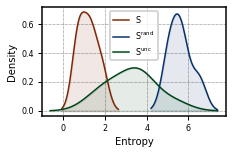

In [25]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'entropy', 'domain')

## Category Entropy Distribution by Individual

In [26]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'entropy', 'category')

TypeError: no numeric data to plot

## Domain Predictability Distribution by Individual

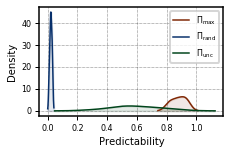

In [27]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'predictability', 'domain')

## Category Predictability Distribution by Individual

In [28]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'predictability', 'category')

TypeError: no numeric data to plot

## Domain Entropy Distribution by Gender

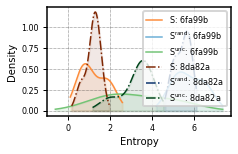

In [29]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'entropy', 'domain', 'gender')

## Category Entropy Distribution by Gender

In [30]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'entropy', 'category', 'gender')

TypeError: no numeric data to plot

## Domain Predictability Distribution by Gender

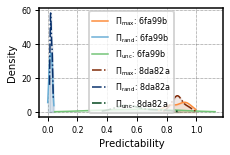

In [31]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'predictability', 'domain', 'gender')

## Category Predictability Distribution by Gender

In [32]:
analysis.display_distribution_plot(analysis.df_predictability, users, 'user', 'predictability', 'category', 'gender')

TypeError: no numeric data to plot